# 関数

## DBSCANのeps設定のための描画
- あんまりわかってない

In [16]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
def get_kdist_plot(X=None, k=None, radius_nbrs=1.0):
    nbrs = NearestNeighbors(n_neighbors=k, radius=radius_nbrs).fit(X)

    # For each point, compute distances to its k-nearest neighbors
    distances, indices = nbrs.kneighbors(X) 

    distances = np.sort(distances, axis=0)
    distances = distances[:, k-1]

    # Plot the sorted K-nearest neighbor distance for each point in the dataset
    plt.figure(figsize=(8,8))
    plt.plot(distances)
    plt.xlabel('Points/Objects in the dataset', fontsize=12)
    plt.ylabel('Sorted {}-nearest neighbor distance'.format(k), fontsize=12)
    plt.grid(True, linestyle="--", color='black', alpha=0.4)
    plt.ylim((0,0.2))
    plt.show()
    plt.close()

## CSV読み込み

In [17]:
import csv
def readCSV(file_path, parse_func) -> list[list]:
    data = None
    with open(file_path, newline='') as csvfile:
        reader = csv.reader(csvfile)
        content = [row for row in reader]
        data:list[list] = []
        for row in content:
            row_data = []
            for d in row:
                row_data.append(parse_func(d))
            data.append(row_data)
    
    return data

## クラスタリングの評価
- return accuracy, precision, recall, f1

In [18]:
from sklearn.metrics import accuracy_score,multilabel_confusion_matrix,precision_score,recall_score,f1_score

def acc_est(clustering_result, quiet=False):
    return _est(clustering_result, "./data/note_sims/sim_acc.csv", "./data/note_sims/not_sim_acc.csv", quiet)

def est(clustering_result, quiet=False):
    return _est(clustering_result, "./data/note_sims/sim.csv", "./data/note_sims/not_sim.csv", quiet)

def label_est(clustering_result, lengths_by_id):
    count = len(clustering_result)
    labels = {True: 1, False:0, None:"none"}
    result_table = [[labels[i == j] for j in clustering_result] for i in clustering_result]
    sim_table = [[labels[None] for _ in clustering_result] for _ in clustering_result]
    sim_label_data = open_sim_label_file("./data/note_sims/sim_label_318.csv")
    for [s,t, label] in sim_label_data:
        # print(s+lengths_by_id[155],t+lengths_by_id[155])
        sim_table[s+lengths_by_id[155]][t+lengths_by_id[155]] = labels[True]
        sim_table[t+lengths_by_id[155]][s+lengths_by_id[155]] = labels[True]
    
    sims_true = []
    sims = []
    for i in range(count):
        for j in range(i+1,count):
            if sim_table[i][j] == labels[None]:
                continue
            
            sims_true.append(sim_table[i][j])
            sims.append(result_table[i][j])

    confusion_matrix = multilabel_confusion_matrix(sims_true, sims)
    accuracy = accuracy_score(sims_true, sims)
    precision = precision_score(sims_true, sims)
    recall = recall_score(sims_true, sims)
    f1 = f1_score(sims_true, sims)
    # print(f"accuracy = {accuracy_score()}")
    return accuracy, precision, recall, f1

def open_sim_label_file(file_path):
    sim_data_label = None
    with open(file_path, newline="") as f:
        reader = csv.reader(f)
        content = [row for row in reader]
        header = content[0]
        sim_data_label = [[int(row[0]), int(row[1]), row[2]] for row in content[1:]]
    return sim_data_label

def _est(clustering_result,sim_file_path, nsim_file_path, quiet=False):
    count = len(clustering_result)
    labels = {True: 1, False:0, None:"none"}
    result_table = [[labels[i == j] for j in clustering_result] for i in clustering_result]
    sim_table = [[labels[None] for _ in clustering_result] for _ in clustering_result]
    sim_data = readCSV(sim_file_path, int)
    not_sim_data = readCSV(nsim_file_path, int)
    if not sim_data or sim_data is None or len(sim_data) == 0:
        print("load error")
        return
    if not not_sim_data or not_sim_data is None or len(not_sim_data) == 0:
        print("load error")
        return

    for [s,t] in sim_data:
        sim_table[s][t] = labels[True]
        sim_table[t][s] = labels[True]
    for [s,t] in not_sim_data:
        sim_table[s][t] = labels[False]
        sim_table[t][s] = labels[False]

    sims_true = []
    sims = []
    for i in range(count):
        for j in range(i+1,count):
            if sim_table[i][j] == labels[None]:
                continue
            
            sims_true.append(sim_table[i][j])
            sims.append(result_table[i][j])

    confusion_matrix = multilabel_confusion_matrix(sims_true, sims)
    accuracy = accuracy_score(sims_true, sims)
    precision = precision_score(sims_true, sims)
    recall = recall_score(sims_true, sims)
    f1 = f1_score(sims_true, sims)
    
    if not quiet:
        print("\n===== 評価 =====")
        print(np.array([["tp rate", "fn rate"], ["tn rate", "tn rate"]]))
        for label, matrix in zip(labels.values(), confusion_matrix):
            print(f"{label=}")
            sm = sum(sum(matrix))
            print(f"{matrix/sm}")
        print(f"{accuracy=}")
        print(f"{precision=}")
        print(f"{recall=}")
        print(f"{f1=}")
        print("=================\n")
    # print(f"accuracy = {accuracy_score()}")
    return accuracy, precision, recall, f1



# main

['./data/_json/feature_vector/test/song155_[test]_fv.json', './data/_json/feature_vector/test/song318_[test]_fv.json']
eps = 1.0


/home/iharuki/zemi/team/2023/watahal_proseka-score/.venv/lib/python3.10/site-packages/sklearn/cluster/_optics.py:992: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


clusters count: 33, length: 863
eps = 2.0


/home/iharuki/zemi/team/2023/watahal_proseka-score/.venv/lib/python3.10/site-packages/sklearn/cluster/_optics.py:992: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


clusters count: 33, length: 863
eps = 3.0


/home/iharuki/zemi/team/2023/watahal_proseka-score/.venv/lib/python3.10/site-packages/sklearn/cluster/_optics.py:992: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


clusters count: 33, length: 863
eps = 4.0


/home/iharuki/zemi/team/2023/watahal_proseka-score/.venv/lib/python3.10/site-packages/sklearn/cluster/_optics.py:992: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


clusters count: 33, length: 863
eps = 5.0


/home/iharuki/zemi/team/2023/watahal_proseka-score/.venv/lib/python3.10/site-packages/sklearn/cluster/_optics.py:992: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


clusters count: 33, length: 863
eps = 6.0


/home/iharuki/zemi/team/2023/watahal_proseka-score/.venv/lib/python3.10/site-packages/sklearn/cluster/_optics.py:992: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


clusters count: 33, length: 863
eps = 7.0


/home/iharuki/zemi/team/2023/watahal_proseka-score/.venv/lib/python3.10/site-packages/sklearn/cluster/_optics.py:992: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


clusters count: 33, length: 863
eps = 8.0


/home/iharuki/zemi/team/2023/watahal_proseka-score/.venv/lib/python3.10/site-packages/sklearn/cluster/_optics.py:992: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


clusters count: 33, length: 863
eps = 9.0


/home/iharuki/zemi/team/2023/watahal_proseka-score/.venv/lib/python3.10/site-packages/sklearn/cluster/_optics.py:992: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


clusters count: 33, length: 863
eps = 10.0


/home/iharuki/zemi/team/2023/watahal_proseka-score/.venv/lib/python3.10/site-packages/sklearn/cluster/_optics.py:992: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


clusters count: 33, length: 863
eps = 11.0


/home/iharuki/zemi/team/2023/watahal_proseka-score/.venv/lib/python3.10/site-packages/sklearn/cluster/_optics.py:992: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


clusters count: 33, length: 863
eps = 12.0


/home/iharuki/zemi/team/2023/watahal_proseka-score/.venv/lib/python3.10/site-packages/sklearn/cluster/_optics.py:992: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


clusters count: 33, length: 863
eps = 13.0


/home/iharuki/zemi/team/2023/watahal_proseka-score/.venv/lib/python3.10/site-packages/sklearn/cluster/_optics.py:992: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


clusters count: 33, length: 863
eps = 14.0


/home/iharuki/zemi/team/2023/watahal_proseka-score/.venv/lib/python3.10/site-packages/sklearn/cluster/_optics.py:992: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


clusters count: 33, length: 863
eps = 15.0


/home/iharuki/zemi/team/2023/watahal_proseka-score/.venv/lib/python3.10/site-packages/sklearn/cluster/_optics.py:992: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


clusters count: 33, length: 863
eps = 16.0


/home/iharuki/zemi/team/2023/watahal_proseka-score/.venv/lib/python3.10/site-packages/sklearn/cluster/_optics.py:992: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


clusters count: 33, length: 863
eps = 17.0


/home/iharuki/zemi/team/2023/watahal_proseka-score/.venv/lib/python3.10/site-packages/sklearn/cluster/_optics.py:992: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


clusters count: 33, length: 863
eps = 18.0


/home/iharuki/zemi/team/2023/watahal_proseka-score/.venv/lib/python3.10/site-packages/sklearn/cluster/_optics.py:992: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


clusters count: 33, length: 863
eps = 19.0


/home/iharuki/zemi/team/2023/watahal_proseka-score/.venv/lib/python3.10/site-packages/sklearn/cluster/_optics.py:992: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


clusters count: 33, length: 863
eps = 20.0


/home/iharuki/zemi/team/2023/watahal_proseka-score/.venv/lib/python3.10/site-packages/sklearn/cluster/_optics.py:992: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


clusters count: 33, length: 863
eps = 21.0


/home/iharuki/zemi/team/2023/watahal_proseka-score/.venv/lib/python3.10/site-packages/sklearn/cluster/_optics.py:992: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


clusters count: 33, length: 863
eps = 22.0


/home/iharuki/zemi/team/2023/watahal_proseka-score/.venv/lib/python3.10/site-packages/sklearn/cluster/_optics.py:992: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


clusters count: 33, length: 863
eps = 23.0


/home/iharuki/zemi/team/2023/watahal_proseka-score/.venv/lib/python3.10/site-packages/sklearn/cluster/_optics.py:992: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


clusters count: 33, length: 863
eps = 24.0


/home/iharuki/zemi/team/2023/watahal_proseka-score/.venv/lib/python3.10/site-packages/sklearn/cluster/_optics.py:992: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


clusters count: 33, length: 863
eps = 25.0


/home/iharuki/zemi/team/2023/watahal_proseka-score/.venv/lib/python3.10/site-packages/sklearn/cluster/_optics.py:992: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


clusters count: 33, length: 863
eps = 26.0


/home/iharuki/zemi/team/2023/watahal_proseka-score/.venv/lib/python3.10/site-packages/sklearn/cluster/_optics.py:992: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


clusters count: 33, length: 863
eps = 27.0


/home/iharuki/zemi/team/2023/watahal_proseka-score/.venv/lib/python3.10/site-packages/sklearn/cluster/_optics.py:992: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


clusters count: 33, length: 863
eps = 28.0


/home/iharuki/zemi/team/2023/watahal_proseka-score/.venv/lib/python3.10/site-packages/sklearn/cluster/_optics.py:992: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


clusters count: 33, length: 863
eps = 29.0


/home/iharuki/zemi/team/2023/watahal_proseka-score/.venv/lib/python3.10/site-packages/sklearn/cluster/_optics.py:992: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


clusters count: 33, length: 863
eps = 30.0


/home/iharuki/zemi/team/2023/watahal_proseka-score/.venv/lib/python3.10/site-packages/sklearn/cluster/_optics.py:992: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


clusters count: 33, length: 863
eps = 31.0


/home/iharuki/zemi/team/2023/watahal_proseka-score/.venv/lib/python3.10/site-packages/sklearn/cluster/_optics.py:992: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


clusters count: 33, length: 863
eps = 32.0


/home/iharuki/zemi/team/2023/watahal_proseka-score/.venv/lib/python3.10/site-packages/sklearn/cluster/_optics.py:992: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


clusters count: 33, length: 863
eps = 33.0


/home/iharuki/zemi/team/2023/watahal_proseka-score/.venv/lib/python3.10/site-packages/sklearn/cluster/_optics.py:992: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


clusters count: 33, length: 863
eps = 34.0


/home/iharuki/zemi/team/2023/watahal_proseka-score/.venv/lib/python3.10/site-packages/sklearn/cluster/_optics.py:992: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


clusters count: 33, length: 863
eps = 35.0


/home/iharuki/zemi/team/2023/watahal_proseka-score/.venv/lib/python3.10/site-packages/sklearn/cluster/_optics.py:992: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


clusters count: 33, length: 863
eps = 36.0


/home/iharuki/zemi/team/2023/watahal_proseka-score/.venv/lib/python3.10/site-packages/sklearn/cluster/_optics.py:992: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


clusters count: 33, length: 863
eps = 37.0


/home/iharuki/zemi/team/2023/watahal_proseka-score/.venv/lib/python3.10/site-packages/sklearn/cluster/_optics.py:992: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


clusters count: 33, length: 863
eps = 38.0


/home/iharuki/zemi/team/2023/watahal_proseka-score/.venv/lib/python3.10/site-packages/sklearn/cluster/_optics.py:992: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


clusters count: 33, length: 863
eps = 39.0


/home/iharuki/zemi/team/2023/watahal_proseka-score/.venv/lib/python3.10/site-packages/sklearn/cluster/_optics.py:992: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


clusters count: 33, length: 863
eps = 40.0


/home/iharuki/zemi/team/2023/watahal_proseka-score/.venv/lib/python3.10/site-packages/sklearn/cluster/_optics.py:992: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


clusters count: 33, length: 863
eps = 41.0


/home/iharuki/zemi/team/2023/watahal_proseka-score/.venv/lib/python3.10/site-packages/sklearn/cluster/_optics.py:992: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


clusters count: 33, length: 863
eps = 42.0


/home/iharuki/zemi/team/2023/watahal_proseka-score/.venv/lib/python3.10/site-packages/sklearn/cluster/_optics.py:992: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


clusters count: 33, length: 863
eps = 43.0


/home/iharuki/zemi/team/2023/watahal_proseka-score/.venv/lib/python3.10/site-packages/sklearn/cluster/_optics.py:992: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


clusters count: 33, length: 863
eps = 44.0


/home/iharuki/zemi/team/2023/watahal_proseka-score/.venv/lib/python3.10/site-packages/sklearn/cluster/_optics.py:992: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


clusters count: 33, length: 863
eps = 45.0


/home/iharuki/zemi/team/2023/watahal_proseka-score/.venv/lib/python3.10/site-packages/sklearn/cluster/_optics.py:992: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


clusters count: 33, length: 863
eps = 46.0


/home/iharuki/zemi/team/2023/watahal_proseka-score/.venv/lib/python3.10/site-packages/sklearn/cluster/_optics.py:992: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


clusters count: 33, length: 863
eps = 47.0


/home/iharuki/zemi/team/2023/watahal_proseka-score/.venv/lib/python3.10/site-packages/sklearn/cluster/_optics.py:992: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


clusters count: 33, length: 863
eps = 48.0


/home/iharuki/zemi/team/2023/watahal_proseka-score/.venv/lib/python3.10/site-packages/sklearn/cluster/_optics.py:992: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


clusters count: 33, length: 863
eps = 49.0


/home/iharuki/zemi/team/2023/watahal_proseka-score/.venv/lib/python3.10/site-packages/sklearn/cluster/_optics.py:992: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


clusters count: 33, length: 863
eps = 50.0


/home/iharuki/zemi/team/2023/watahal_proseka-score/.venv/lib/python3.10/site-packages/sklearn/cluster/_optics.py:992: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


clusters count: 33, length: 863
eps = 51.0


/home/iharuki/zemi/team/2023/watahal_proseka-score/.venv/lib/python3.10/site-packages/sklearn/cluster/_optics.py:992: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


clusters count: 33, length: 863
eps = 52.0


/home/iharuki/zemi/team/2023/watahal_proseka-score/.venv/lib/python3.10/site-packages/sklearn/cluster/_optics.py:992: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


clusters count: 33, length: 863
eps = 53.0


/home/iharuki/zemi/team/2023/watahal_proseka-score/.venv/lib/python3.10/site-packages/sklearn/cluster/_optics.py:992: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


clusters count: 33, length: 863
eps = 54.0


/home/iharuki/zemi/team/2023/watahal_proseka-score/.venv/lib/python3.10/site-packages/sklearn/cluster/_optics.py:992: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


clusters count: 33, length: 863
eps = 55.0


/home/iharuki/zemi/team/2023/watahal_proseka-score/.venv/lib/python3.10/site-packages/sklearn/cluster/_optics.py:992: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


clusters count: 33, length: 863
eps = 56.0


/home/iharuki/zemi/team/2023/watahal_proseka-score/.venv/lib/python3.10/site-packages/sklearn/cluster/_optics.py:992: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


clusters count: 33, length: 863
eps = 57.0


/home/iharuki/zemi/team/2023/watahal_proseka-score/.venv/lib/python3.10/site-packages/sklearn/cluster/_optics.py:992: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


clusters count: 33, length: 863
eps = 58.0


/home/iharuki/zemi/team/2023/watahal_proseka-score/.venv/lib/python3.10/site-packages/sklearn/cluster/_optics.py:992: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


clusters count: 33, length: 863
eps = 59.0


/home/iharuki/zemi/team/2023/watahal_proseka-score/.venv/lib/python3.10/site-packages/sklearn/cluster/_optics.py:992: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


clusters count: 33, length: 863
eps = 60.0


/home/iharuki/zemi/team/2023/watahal_proseka-score/.venv/lib/python3.10/site-packages/sklearn/cluster/_optics.py:992: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


clusters count: 33, length: 863
eps = 61.0


/home/iharuki/zemi/team/2023/watahal_proseka-score/.venv/lib/python3.10/site-packages/sklearn/cluster/_optics.py:992: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


clusters count: 33, length: 863
eps = 62.0


/home/iharuki/zemi/team/2023/watahal_proseka-score/.venv/lib/python3.10/site-packages/sklearn/cluster/_optics.py:992: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


clusters count: 33, length: 863
eps = 63.0


/home/iharuki/zemi/team/2023/watahal_proseka-score/.venv/lib/python3.10/site-packages/sklearn/cluster/_optics.py:992: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


clusters count: 33, length: 863
eps = 64.0


/home/iharuki/zemi/team/2023/watahal_proseka-score/.venv/lib/python3.10/site-packages/sklearn/cluster/_optics.py:992: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


clusters count: 33, length: 863
eps = 65.0


/home/iharuki/zemi/team/2023/watahal_proseka-score/.venv/lib/python3.10/site-packages/sklearn/cluster/_optics.py:992: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


clusters count: 33, length: 863
eps = 66.0


/home/iharuki/zemi/team/2023/watahal_proseka-score/.venv/lib/python3.10/site-packages/sklearn/cluster/_optics.py:992: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


clusters count: 33, length: 863
eps = 67.0


/home/iharuki/zemi/team/2023/watahal_proseka-score/.venv/lib/python3.10/site-packages/sklearn/cluster/_optics.py:992: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


clusters count: 33, length: 863
eps = 68.0


/home/iharuki/zemi/team/2023/watahal_proseka-score/.venv/lib/python3.10/site-packages/sklearn/cluster/_optics.py:992: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


clusters count: 33, length: 863
eps = 69.0


/home/iharuki/zemi/team/2023/watahal_proseka-score/.venv/lib/python3.10/site-packages/sklearn/cluster/_optics.py:992: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


clusters count: 33, length: 863
eps = 70.0


/home/iharuki/zemi/team/2023/watahal_proseka-score/.venv/lib/python3.10/site-packages/sklearn/cluster/_optics.py:992: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


clusters count: 33, length: 863
eps = 71.0


/home/iharuki/zemi/team/2023/watahal_proseka-score/.venv/lib/python3.10/site-packages/sklearn/cluster/_optics.py:992: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


clusters count: 33, length: 863
eps = 72.0


/home/iharuki/zemi/team/2023/watahal_proseka-score/.venv/lib/python3.10/site-packages/sklearn/cluster/_optics.py:992: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


clusters count: 33, length: 863
eps = 73.0


/home/iharuki/zemi/team/2023/watahal_proseka-score/.venv/lib/python3.10/site-packages/sklearn/cluster/_optics.py:992: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


clusters count: 33, length: 863
eps = 74.0


/home/iharuki/zemi/team/2023/watahal_proseka-score/.venv/lib/python3.10/site-packages/sklearn/cluster/_optics.py:992: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


clusters count: 33, length: 863
eps = 75.0


/home/iharuki/zemi/team/2023/watahal_proseka-score/.venv/lib/python3.10/site-packages/sklearn/cluster/_optics.py:992: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


clusters count: 33, length: 863
eps = 76.0


/home/iharuki/zemi/team/2023/watahal_proseka-score/.venv/lib/python3.10/site-packages/sklearn/cluster/_optics.py:992: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


clusters count: 33, length: 863
eps = 77.0


/home/iharuki/zemi/team/2023/watahal_proseka-score/.venv/lib/python3.10/site-packages/sklearn/cluster/_optics.py:992: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


clusters count: 33, length: 863
eps = 78.0


/home/iharuki/zemi/team/2023/watahal_proseka-score/.venv/lib/python3.10/site-packages/sklearn/cluster/_optics.py:992: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


clusters count: 33, length: 863
eps = 79.0


/home/iharuki/zemi/team/2023/watahal_proseka-score/.venv/lib/python3.10/site-packages/sklearn/cluster/_optics.py:992: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


clusters count: 33, length: 863
eps = 80.0


/home/iharuki/zemi/team/2023/watahal_proseka-score/.venv/lib/python3.10/site-packages/sklearn/cluster/_optics.py:992: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


clusters count: 33, length: 863
eps = 81.0


/home/iharuki/zemi/team/2023/watahal_proseka-score/.venv/lib/python3.10/site-packages/sklearn/cluster/_optics.py:992: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


clusters count: 33, length: 863
eps = 82.0


/home/iharuki/zemi/team/2023/watahal_proseka-score/.venv/lib/python3.10/site-packages/sklearn/cluster/_optics.py:992: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


clusters count: 33, length: 863
eps = 83.0


/home/iharuki/zemi/team/2023/watahal_proseka-score/.venv/lib/python3.10/site-packages/sklearn/cluster/_optics.py:992: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


clusters count: 33, length: 863
eps = 84.0


/home/iharuki/zemi/team/2023/watahal_proseka-score/.venv/lib/python3.10/site-packages/sklearn/cluster/_optics.py:992: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


clusters count: 33, length: 863
eps = 85.0


/home/iharuki/zemi/team/2023/watahal_proseka-score/.venv/lib/python3.10/site-packages/sklearn/cluster/_optics.py:992: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


clusters count: 33, length: 863
eps = 86.0


/home/iharuki/zemi/team/2023/watahal_proseka-score/.venv/lib/python3.10/site-packages/sklearn/cluster/_optics.py:992: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


clusters count: 33, length: 863
eps = 87.0


/home/iharuki/zemi/team/2023/watahal_proseka-score/.venv/lib/python3.10/site-packages/sklearn/cluster/_optics.py:992: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


clusters count: 33, length: 863
eps = 88.0


/home/iharuki/zemi/team/2023/watahal_proseka-score/.venv/lib/python3.10/site-packages/sklearn/cluster/_optics.py:992: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


clusters count: 33, length: 863
eps = 89.0


/home/iharuki/zemi/team/2023/watahal_proseka-score/.venv/lib/python3.10/site-packages/sklearn/cluster/_optics.py:992: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


clusters count: 33, length: 863
eps = 90.0


/home/iharuki/zemi/team/2023/watahal_proseka-score/.venv/lib/python3.10/site-packages/sklearn/cluster/_optics.py:992: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


clusters count: 33, length: 863
eps = 91.0


/home/iharuki/zemi/team/2023/watahal_proseka-score/.venv/lib/python3.10/site-packages/sklearn/cluster/_optics.py:992: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


clusters count: 33, length: 863
eps = 92.0


/home/iharuki/zemi/team/2023/watahal_proseka-score/.venv/lib/python3.10/site-packages/sklearn/cluster/_optics.py:992: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


clusters count: 33, length: 863
eps = 93.0


/home/iharuki/zemi/team/2023/watahal_proseka-score/.venv/lib/python3.10/site-packages/sklearn/cluster/_optics.py:992: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


clusters count: 33, length: 863
eps = 94.0


/home/iharuki/zemi/team/2023/watahal_proseka-score/.venv/lib/python3.10/site-packages/sklearn/cluster/_optics.py:992: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


clusters count: 33, length: 863
eps = 95.0


/home/iharuki/zemi/team/2023/watahal_proseka-score/.venv/lib/python3.10/site-packages/sklearn/cluster/_optics.py:992: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


clusters count: 33, length: 863
eps = 96.0


/home/iharuki/zemi/team/2023/watahal_proseka-score/.venv/lib/python3.10/site-packages/sklearn/cluster/_optics.py:992: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


clusters count: 33, length: 863
eps = 97.0


/home/iharuki/zemi/team/2023/watahal_proseka-score/.venv/lib/python3.10/site-packages/sklearn/cluster/_optics.py:992: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


clusters count: 33, length: 863
eps = 98.0


/home/iharuki/zemi/team/2023/watahal_proseka-score/.venv/lib/python3.10/site-packages/sklearn/cluster/_optics.py:992: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


clusters count: 33, length: 863
eps = 99.0


/home/iharuki/zemi/team/2023/watahal_proseka-score/.venv/lib/python3.10/site-packages/sklearn/cluster/_optics.py:992: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


clusters count: 33, length: 863
accuracy_max=0.9583333333333334
0.918918918918919
0.8947368421052632
0.918918918918919
accuracy_max=0.9030303030303031
0.8461538461538461
0.8301886792452831
0.8461538461538461
accuracy_max=0.15317286652078774
0.26565464895635676
0.15317286652078774
0.26565464895635676


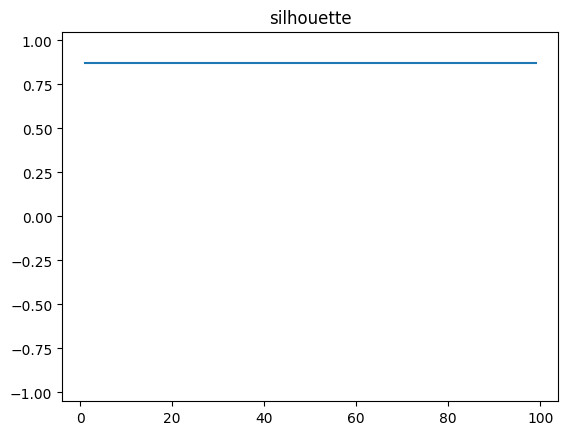

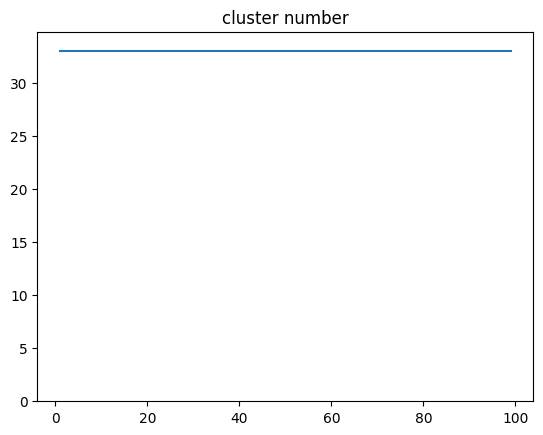

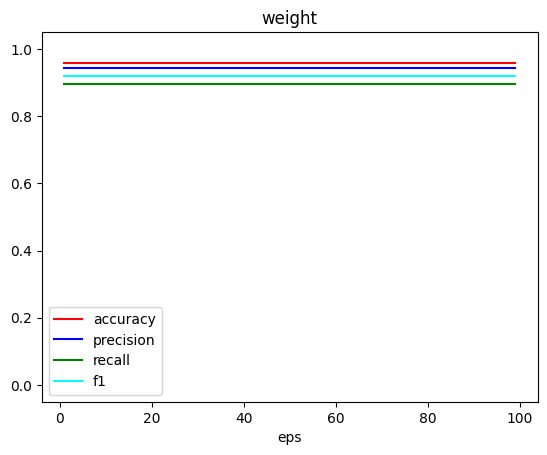

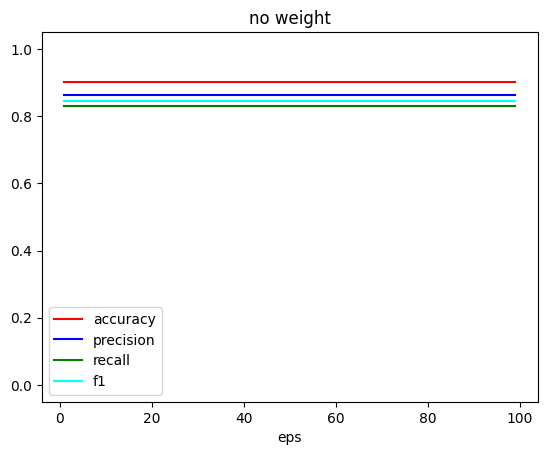

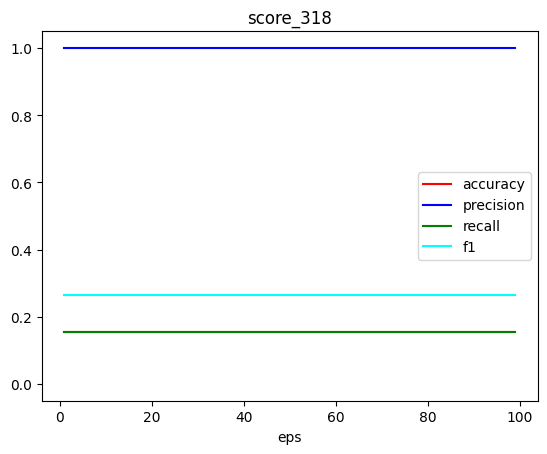

In [23]:
import numpy as np
from sklearn import preprocessing
from sklearn.cluster import DBSCAN, OPTICS
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
import os
import json
import glob
import csv
import pprint
import matplotlib.pyplot as plt

notes_file_paths = glob.glob("./data/_json/feature_vector/test/*song155*[[]test[]]*.json")
notes_file_paths += glob.glob("./data/_json/feature_vector/test/*song318*[[]test[]]*.json")
# notes_file_paths = [f for f in notes_file_paths if "155" in f or "318" in f]
print(notes_file_paths)
data = []
ids = []
lengths = []
lengths_by_id = dict()
id_by_path = dict()
for file_path in notes_file_paths:
    # data = None
    # id = None
    with open(file_path, newline="") as f:
        content = json.load(f)
        data += content["data"]
        ids.append(content["id"])
        lengths.append(len(content["data"]))
        lengths_by_id[int(content["id"])] = len(content["data"])
        id_by_path[file_path] = content["id"]
        # print("data len", len(data))
        # print("content len", len(content["data"]))
        # print(lengths_by_id)

    # k = 2 * len(data[0]) - 1 # k=2*{dim(dataset)} - 1
    # get_kdist_plot(X=data, k=k)
data = preprocessing.StandardScaler().fit_transform(np.array(data))
# train_data = preprocessing.StandardScaler().fit_transform(np.array(train_data))
# クラスタリング
range_max = 100
range_step = 100
range_min = range_max/range_step
step = range_max/range_step
now = range_min
rng = []
for i in range(range_step):
    if now < range_max:
        rng.append(now)
    now += step


epses = []
silhouettes = []
cluster_counts = []
weight_scores = []
no_weight_scores = []
score_318 = []

for eps in rng:
    print(f"eps = {eps}")
    epses.append(eps)

    clustering_result = OPTICS(eps=eps, min_samples=3).fit_predict(data)
    clustering_result += 1
    # noise = len(set(clustering_result))+2
    # for i in range(len(clustering_result)):
    #     if clustering_result[i] == -1:
    #         clustering_result[i] = noise
    #         noise += 1
    

    cluster_count = len(set(clustering_result))
    cluster_counts.append(cluster_count)
    print(f"clusters count: {cluster_count}, length: {len(clustering_result)}")

    silhouette = silhouette_score(data, clustering_result)
    silhouettes.append(silhouette)

    accuracy, precision, recall, f1 = acc_est(clustering_result, True)
    weight_scores.append([accuracy, precision, recall, f1])

    accuracy, precision, recall, f1 = est(clustering_result, True)
    no_weight_scores.append([accuracy, precision, recall, f1])
    le = label_est(clustering_result, lengths_by_id)
    score_318.append(list(le))


def print_scores_max(scores):
    accuracy_max = max(scores[0])
    recall_max = max(scores[1])
    precision_max = max(scores[2])
    recall_max = max(scores[3])
    print(f"{accuracy_max=}\n{recall_max}\n{precision_max}\n{recall_max}")


weight_scores = list(zip(*weight_scores))
no_weight_scores = list(zip(*no_weight_scores))
score_318 = list(zip(*score_318))
print_scores_max(weight_scores)
print_scores_max(no_weight_scores)
print_scores_max(score_318)


plt.plot(epses, silhouettes)
plt.title("silhouette")
plt.ylim([-1.05, 1.05])
plt.show()


plt.plot(epses, cluster_counts)
plt.title("cluster number")
plt.ylim(bottom=-0.05)
plt.show()


colors = ["red", "blue", "green", "cyan"]
labels = ["accuracy", "precision", "recall", "f1"]


# weight score
for i in range(len(weight_scores)):
    plt.plot(epses, weight_scores[i], color=colors[i], label=labels[i])
plt.ylim([-0.05, 1.05])
plt.xlabel("eps")
plt.title("weight")
plt.legend()
plt.show()


# no_weight_scores
for i in range(len(no_weight_scores)):
    plt.plot(epses, no_weight_scores[i], color=colors[i], label=labels[i])
plt.ylim([-0.05, 1.05])
plt.xlabel("eps")
plt.title("no weight")
plt.legend()
plt.show()

for i in range(len(score_318)):
    plt.plot(epses, score_318[i], color=colors[i], label=labels[i])
plt.ylim([-0.05, 1.05])
plt.xlabel("eps")
plt.title("score_318")
plt.legend()
plt.show()

# 特定のepsを描画

In [ ]:
from sklearn.cluster import DBSCAN, OPTICS
from sklearn.manifold import TSNE
import csv

def clustering(data, eps):
    clustering_result = OPTICS(eps=eps, min_samples=3).fit_predict(data)
    noise = len(set(clustering_result))+2
    for i in range(len(clustering_result)):
        if clustering_result[i] == -1:
            clustering_result[i] = -1*noise
            noise += 1
    return clustering_result

def dim_reduce_tsne(data):
    tsne = TSNE(n_components=2, random_state=0)
    data_tsne = tsne.fit_transform(data)
    return data_tsne

def clustering_tsne_plot(data,eps):
    data_tsne = dim_reduce_tsne(data)
    clustering_result = clustering(data, eps)

    plt.scatter(data_tsne[:,0],data_tsne[:,1], c=clustering_result, cmap="gist_ncar")
    plt.show()


clustering_result = clustering(data, 0.1)
sim_label_data = open_sim_label_file("./data/note_sims/sim_label_318.csv")

ids_by_label:dict[str, set[int]] = dict()
for [s,t, label] in sim_label_data:
    arr = ids_by_label.get(label, set())
    arr.add(s+lengths_by_id[155])
    arr.add(t+lengths_by_id[155])
    ids_by_label[label] = arr

colors = ["red", "green", "blue", "purple", "black", "cyan"]

tsne = TSNE(n_components=2, random_state=0)
data_tsne = tsne.fit_transform(data)
plt.scatter(data_tsne[:,0],data_tsne[:,1], s=[50]*len(data_tsne),c=clustering_result, cmap="gist_ncar")
for i, (k, ids) in enumerate(ids_by_label.items()):
    show_data = np.array([d for i,d in enumerate(data_tsne) if i in ids])
    plt.scatter(show_data[:,0],show_data[:,1], color=colors[i], s=[8]*len(show_data), label=k)
plt.legend()
plt.show()

from umap import UMAP
umap = UMAP(n_components=2, random_state=0)
data_umap = umap.fit_transform(data)
plt.scatter(data_umap[:,0],data_umap[:,1], c=clustering_result, cmap="gist_ncar")
for i, (k, ids) in enumerate(ids_by_label.items()):
    show_data = np.array([d for i,d in enumerate(data_umap) if i in ids])
    plt.scatter(show_data[:,0],show_data[:,1], color=colors[i], s=[8]*len(show_data), label=k)
plt.legend()
plt.show()

from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=0)
data_pca = pca.fit_transform(data)
plt.scatter(data_pca[:,0],data_pca[:,1], c=clustering_result, cmap="gist_ncar")
for i, (k, ids) in enumerate(ids_by_label.items()):
    show_data = np.array([d for i,d in enumerate(data_pca) if i in ids])
    plt.scatter(show_data[:,0],show_data[:,1], color=colors[i], s=[8]*len(show_data), label=k)
plt.legend()
plt.show()

# クラスタリング結果の保存

In [ ]:
import datetime
import os

def save_clustering_tsne_data(data,eps, save_dir, save_file_name):
    os.makedirs(save_dir, exist_ok=True)
    with open(f"{save_dir}/{save_file_name}", "w", newline="") as f:
        writer = csv.writer(f)
        writer.writerow(["id","x", "y", "label"])
    clustering_result = clustering(data,eps)
    data_tsne = dim_reduce_tsne(data)
    # 各区間ごとのデータ
    # for d in zip(data_tsne, clustering_result):
    #     print(d)
    clustering_data = [[id,float(pos[0]), float(pos[1]), int(l)]for (pos, l) in zip(data_tsne, clustering_result)]

    with open(f"{save_dir}/{save_file_name}", "a", newline="") as f:
        writer = csv.writer(f)
        writer.writerows(clustering_data)

save_dir = "./data/_json/0726/clustering_result"
save_file_name = "clustering_data_test.csv"
save_clustering_tsne_data(data,0.1, save_dir, save_file_name)

# base_dir = "./data/_vis-result"
# time_dir_path = f"{base_dir}/{str(datetime.date.today())}"
# cluster_labels_dir = f"{time_dir_path}/{str(datetime.datetime.now().time())}-cluster-labels"
# os.makedirs(cluster_labels_dir, exist_ok=True)

# clustering_result = clustering(0.1)
# clustering_labels = set(clustering_result)
# for label in clustering_labels:
#     for id in ids:
#         os.makedirs(f"{cluster_labels_dir}/{id}/{label}", exist_ok=True)

# clustering_result_by_id = dict()
# result_idx = 0
# for id, length in zip(ids, lengths):
#     result = clustering_result[result_idx:result_idx+length]
#     clustering_result_by_id[id] = result
#     result_idx = length
#     print(len(result), length)


# import os
# from section_divide import _get_section
# from classes.types import HoldType, JudgeType, NotesType
# from classes.types.HoldType import HoldType

# notes_file_paths = glob.glob("./../proseka/datas/*.json")
# notes_file_paths = [f for f in notes_file_paths if "155" in f or "318" in f]
# for path_name in notes_file_paths:
#     file_name = os.path.basename(path_name)
#     sections = _get_section(path_name)
#     id = int(path_name.split("song")[1][:-5])
#     labels = clustering_result_by_id[id]

#     for j,section_j in enumerate(sections):
#         # normal
#         xs = np.array([note.x for note in section_j if note.type != NotesType.HOLD])
#         ys = np.array([note.y for note in section_j if note.type != NotesType.HOLD], dtype="float64")
#         plt.scatter(xs,ys, color="b")
        
#         hold_x = []
#         hold_y = []
#         for note in section_j:
#             if note.type != NotesType.HOLD:
#                 continue
            
#             hold_x.append(note.x)
#             hold_y.append(note.y)
            
#             if note.hold_type == HoldType.END:
#                 # plt.plot(hold_x, np.array(hold_y) - min_y, color="g",  marker="o")
#                 plt.plot(hold_x, hold_y, color="g",  marker="o")
#                 hold_x = []
#                 hold_y = []
#                 continue
        
#         if len(hold_x) != 0:
#             plt.plot(hold_x, hold_y, color="g",  marker="o")
#             hold_x = []
#             hold_y = []
            

#         plt.xlim([-0.3,12.3])
#         plt.savefig(f"{cluster_labels_dir}/{id}/{labels[j]}/{j}.png")
#         plt.close()
#         # if len(section_j) == 66:
#         #     for note in section_j:
#         #         print(note)
